https://www.randpy.tokyo/entry/python_random_forest

###1.決定木（精度、木の可視化)

###2.ランダムフォレスト(精度、重要度のプロット）

###3.番外編(kaggle式の前処理をした上での精度比較)



In [ ]:
# DataSet URL : https://www.kaggle.com/c/titanic/data

import pandas as pd

df = pd.read_csv('/content/titanic_train.csv')

print(df)
print(df.columns)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#df = pd.read_csv("/content/sample_data/california_housing_test.csv")
#print(df)

#df2 = pd.read_csv("/content/sample_data/mnist_train_small.csv")
#print(df2)

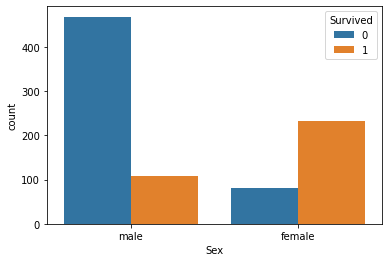

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm

sns.countplot('Sex',hue='Survived',data=df)

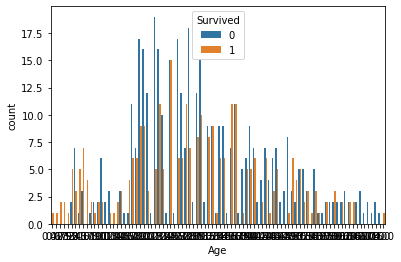

In [ ]:
sns.countplot('Age',hue='Survived',data=df)

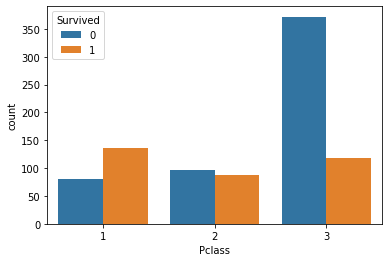

In [ ]:
sns.countplot('Pclass',hue='Survived',data=df)

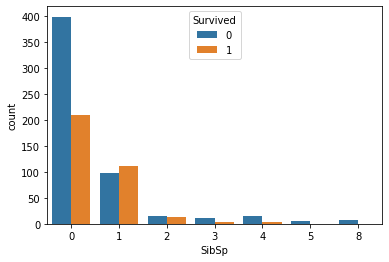

In [ ]:
sns.countplot('SibSp',hue='Survived',data=df)

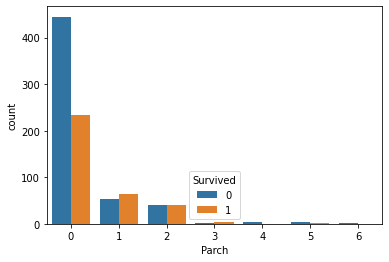

In [ ]:
sns.countplot('Parch',hue='Survived',data=df)

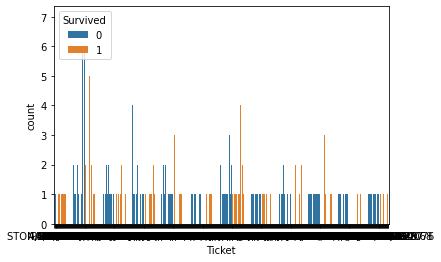

In [ ]:
sns.countplot('Ticket',hue='Survived',data=df)

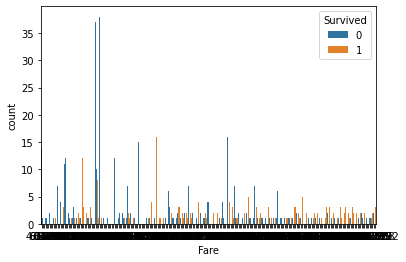

In [ ]:
sns.countplot('Fare',hue='Survived',data=df)

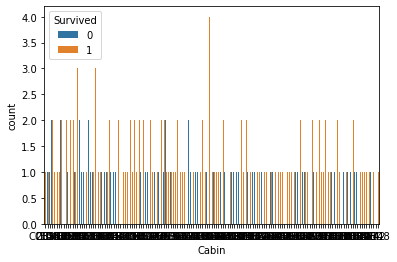

In [ ]:
sns.countplot('Cabin',hue='Survived',data=df)

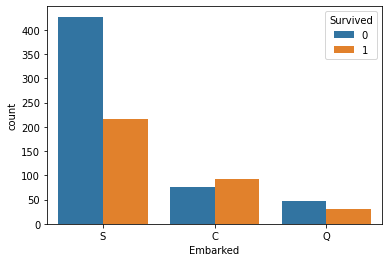

In [ ]:
sns.countplot('Embarked',hue='Survived',data=df)

In [ ]:
from sklearn.model_selection import train_test_split

#欠損値処理(今回は平均値を代入)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換(数値に変換する処理)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#使用しないデータカラムを削除
df2 = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

train_X = df2.drop('Survived', axis=1)
train_y = df2.Survived

(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)
# random_stateでseedを固定しないと毎回学習データと検証データが変わってしまうので、固定する


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 公式DOC : http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
## criterion : 分割基準。gini or entropyを選択。(デフォルトでジニ係数)
## max_depth : 木の深さ。木が深くなるほど過学習し易いので、適当なしきい値を設定してあげる
## max_features ： 最適な分割をする際の特徴量の数
## min_samples_split ： 分岐する際のサンプル数
## random_state ： ランダムseedの設定。seedを設定しないと、毎回モデル結果が変わる

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)


In [ ]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.7947761194029851

In [ ]:
#!pip install pydotplus
#!pip install graphviz

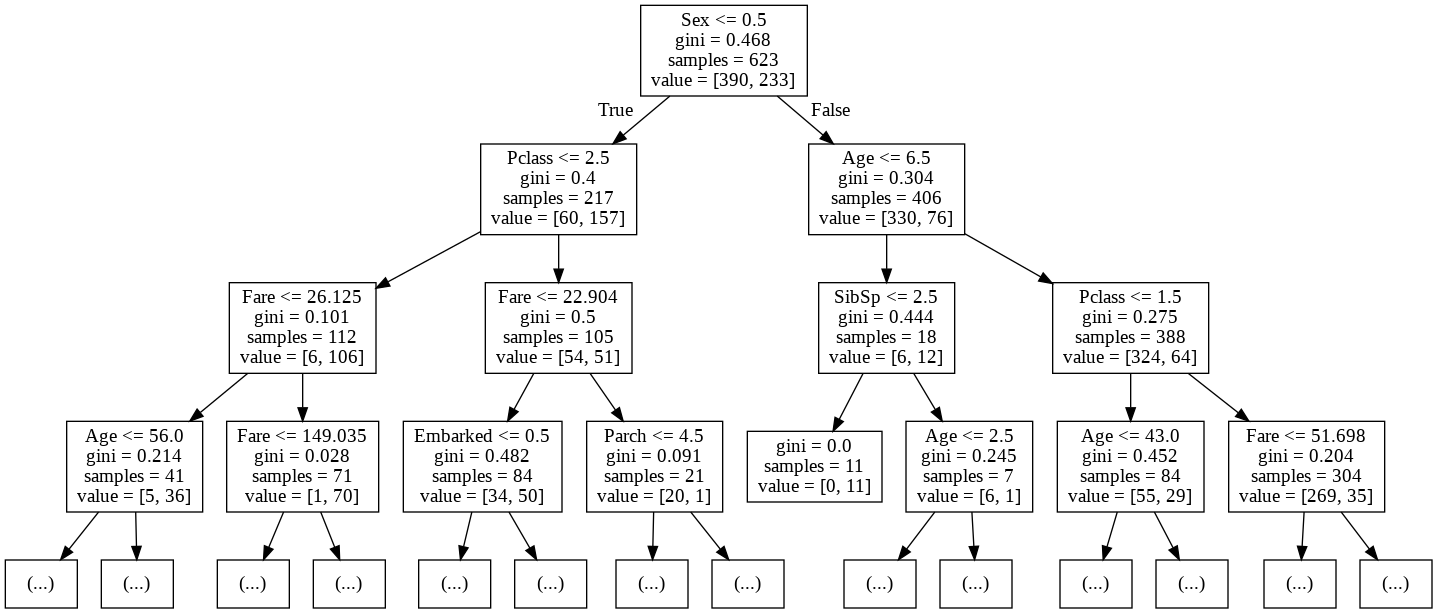

In [ ]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn import tree #追加 参考URL : https://qiita.com/takahashi_yukou/items/5251bada1c3dc453c508

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

In [ ]:
"""
    決定木系モデルを視覚化する。
    Graphviz を用いて、決定木のモデルを視覚化する。
    決定木だけでなく、ランダムフォレストなど木構造のモデルに適用できる。

"""

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # cross_validation -> model_selection
from sklearn.model_selection import cross_val_score

# モデルの木構造の視覚化に必要なパッケージ
from sklearn import tree
import pydotplus as pdp

import pandas as pd
import numpy as np


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) #特徴量の名前は iris.feature_names にセットされています

print(df.head(5))
print(iris.target) #目的変数（＝アヤメの種類）は iris.target にセットされているが、数字の状態
print(iris.target_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # iris.target_names にある種類名の表記を使い、人間が読める(=human-redable)な目的変数をdf['species'] にセット
print(df.head(5))


# 学習データとテストデータを分ける
features = df.columns[:4]
label = df["species"]
print(features)
print(label)
print(df[features].head(5))
df_train, df_test, label_train, label_test = train_test_split(df[features], label) #特徴量部分は features に、目的変数は label にセットし、モデル学習用とテスト用のデータに分割

clf = RandomForestClassifier(n_estimators=150) #使用する決定木の数は150個としています
clf.fit(df_train, label_train)
print("========================================================")
print("予測の精度")
print(clf.score(df_test, label_test))


# 試しに木の一つを視覚化する
estimators = clf.estimators_ #estimators_ は、決定木オブジェクトのリスト
file_name = "./tree_visualization.png"
dot_data = tree.export_graphviz(estimators[0], # 決定木オブジェクトを一つ指定する
                                out_file=None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                                filled=True, # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=features, # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=iris.target_names, # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True # 特殊文字を扱えるようにする
                                )
graph = pdp.graph_from_dot_data(dot_data)
graph.write_png(file_name)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.

True